In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import matplotlib.font_manager as fm
from matplotlib.font_manager import FontProperties
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 30)


In [43]:
data = pd.read_csv (r'./Vanessa/20231003_Tau_Table_Test.csv') 
data

,Entry 1,Entry 2,Entry 3,Unnamed: 3,Unnamed: 4,Reference,Strategy,Treatment,Synonymns,Clinical trials 'Tauopathies',Registration numbers,Treatment Start Age (mo),Treatment End Age (mo),Treatment Duration (mo) (1mo=28d),Treatment Route,Notes,Model,Gender,AT8,PHF*,Other p-tau*,Glycosylation,Misfolding,Acetylation,Cleavage,Insoluble / Aggregate tau,Tau Seeding,Tangles,Pathological Tau,Tau Enzymes,Volume / Neuronal loss,Neurite dystrophy,Synaptic Dysfunction,Neuroinflammation,Autophagy,Cognitive impairment,Motor,Survival,Imaging / Biomarkers,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42
0,HL,JZ,HL,check,check,Asuni et al. 2007,active immunization,Tau379-408 pS396/S404 peptide,NaN,no,NaN,2-5 mo or 2-8 mo,NaN,NaN,SC,NaN,P301L,M/F,NT,DE,NT,NT,DE,NT,NT,NE,NT,NT,DE,NT,NT,NT,NT,NT,NT,NE,DE,NT,NT,10.1523/JNEUROSCI.2361-07.2007,17715348.0,NaN,NaN
1,HL,JZ,HL,check,check,Selenica et al. 2014b,active immunization,P301L tau (4R0N) peptide,NaN,no,NaN,5-10 mo,NaN,NaN,SC,rTg4510 mice are multitransgenic,rTg4510 (P301L),M/F,DE,NT,NE,NT,NT,NT,NT,NT,NT,NE,DE,NT,NT,NT,NT,DE,NT,NT,NT,NT,DE,10.1186/s12974-014-0152-0,25183004.0,NaN,NaN
2,JZ,TM,HL,check,check,Bi et al. 2011,active immunization,Tau395-406 pS396/S404 peptide,NaN,no,NaN,4-5 or 8-9 or 18-19 mo,NaN,NaN,IP,NaN,pR5 (P301L),NaN,NT,DE,DE,NT,NT,NT,NT,NT,NT,DE,DE,NT,NT,NT,NT,DE,NT,NT,NT,NT,NT,10.1371/journal.pone.0026860,22174735.0,NaN,NaN
3,JZ,TM,HL,no,no,Boimel et al. 2010,active immunization,Various p-tau peptides,NaN,no,NaN,4-12 mo,NaN,NaN,SC,NaN,DM-htau,F,DE,NT,DE,NT,NT,NT,NT,NT,NT,DE,DE,NT,NT,NT,NT,DE,DE,NT,NT,NT,NT,10.1016/j.expneurol.2010.05.010,20546729.0,NaN,NaN
4,JZ,hl,HL,check,check,Richter et al. 2014,active immunization,Various p-tau peptides,NaN,no,NaN,2.5 to 5/8/12 mo,NaN,NaN,SQ and IP,NaN,P301S (PS19),F,DE,NT,NE,NT,NT,NT,NT,NT,NT,NT,DE,NT,NT,NT,NT,NT,NT,NT,DE,NE,NT,10.3390/vaccines2030601,26344748.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,VL,DS,NaN,NaN,NaN,Zhong 2023,other,quercetagitrin,NaN,no,NaN,6,9,3,Drinking Water,NaN,P301S-Tau,M,DE,NT,DE,NT,NT,DE,NT,DE,NT,DE,DE,DE,DE,DE,NT,DE,NT,DE,NE,NT,NT,10.3390/molecules28093964,37175376.0,Treatment timeline was shown in fig 4c but the...,NaN
278,VL,DS,NaN,NaN,NaN,Zhu 2022,immune response modulation,Crry shRNA (complement regulatory protein),NaN,no,NaN,6,"6, mice tested at 8 mo","Acute, mice tested 2 mo post-injection",Intracortical and intrahippocampal Injections,NaN,PS19 (P301S),M,DE,NT,DE,NT,NT,NT,DE,NT,NT,NT,DE,DE,DE,DE,NT,DE,NT,DE,NT,NT,NT,10.4103/1673-5374.332160,35017447.0,NaN,NaN
279,VL,DS,NaN,NaN,NaN,Damianich 2021,other,PTM4R (pre-trans-splicing molecule able to bin...,NaN,no,NaN,3,3,acute,Intrastriatal injection,NaN,hTau,M,NT,NT,DE,NT,NT,NT,NT,NT,NT,NT,DE,NT,NT,NT,DE,NT,NT,NT,DE,NT,NT,10.1093/brain/awab130,34059893.0,NaN,NaN
280,DS,NaN,needs a second reviewer,NaN,NaN,Espindola et al 2018,other,PTM4R (RNA trans-splicing to modulate tau exon...,NaN,no,NaN,3-Feb,12-Oct,9-Aug,intra-prefrontal cortex injection,NaN,hTau,M,NT,NT,DE,NT,NT,NT,NT,DE,NT,NT,DE,NT,NT,NT,DE,NT,NT,NT,NT,NT,NT,10.1016/j.celrep.2018.03.079,29669277.0,NaN,NaN


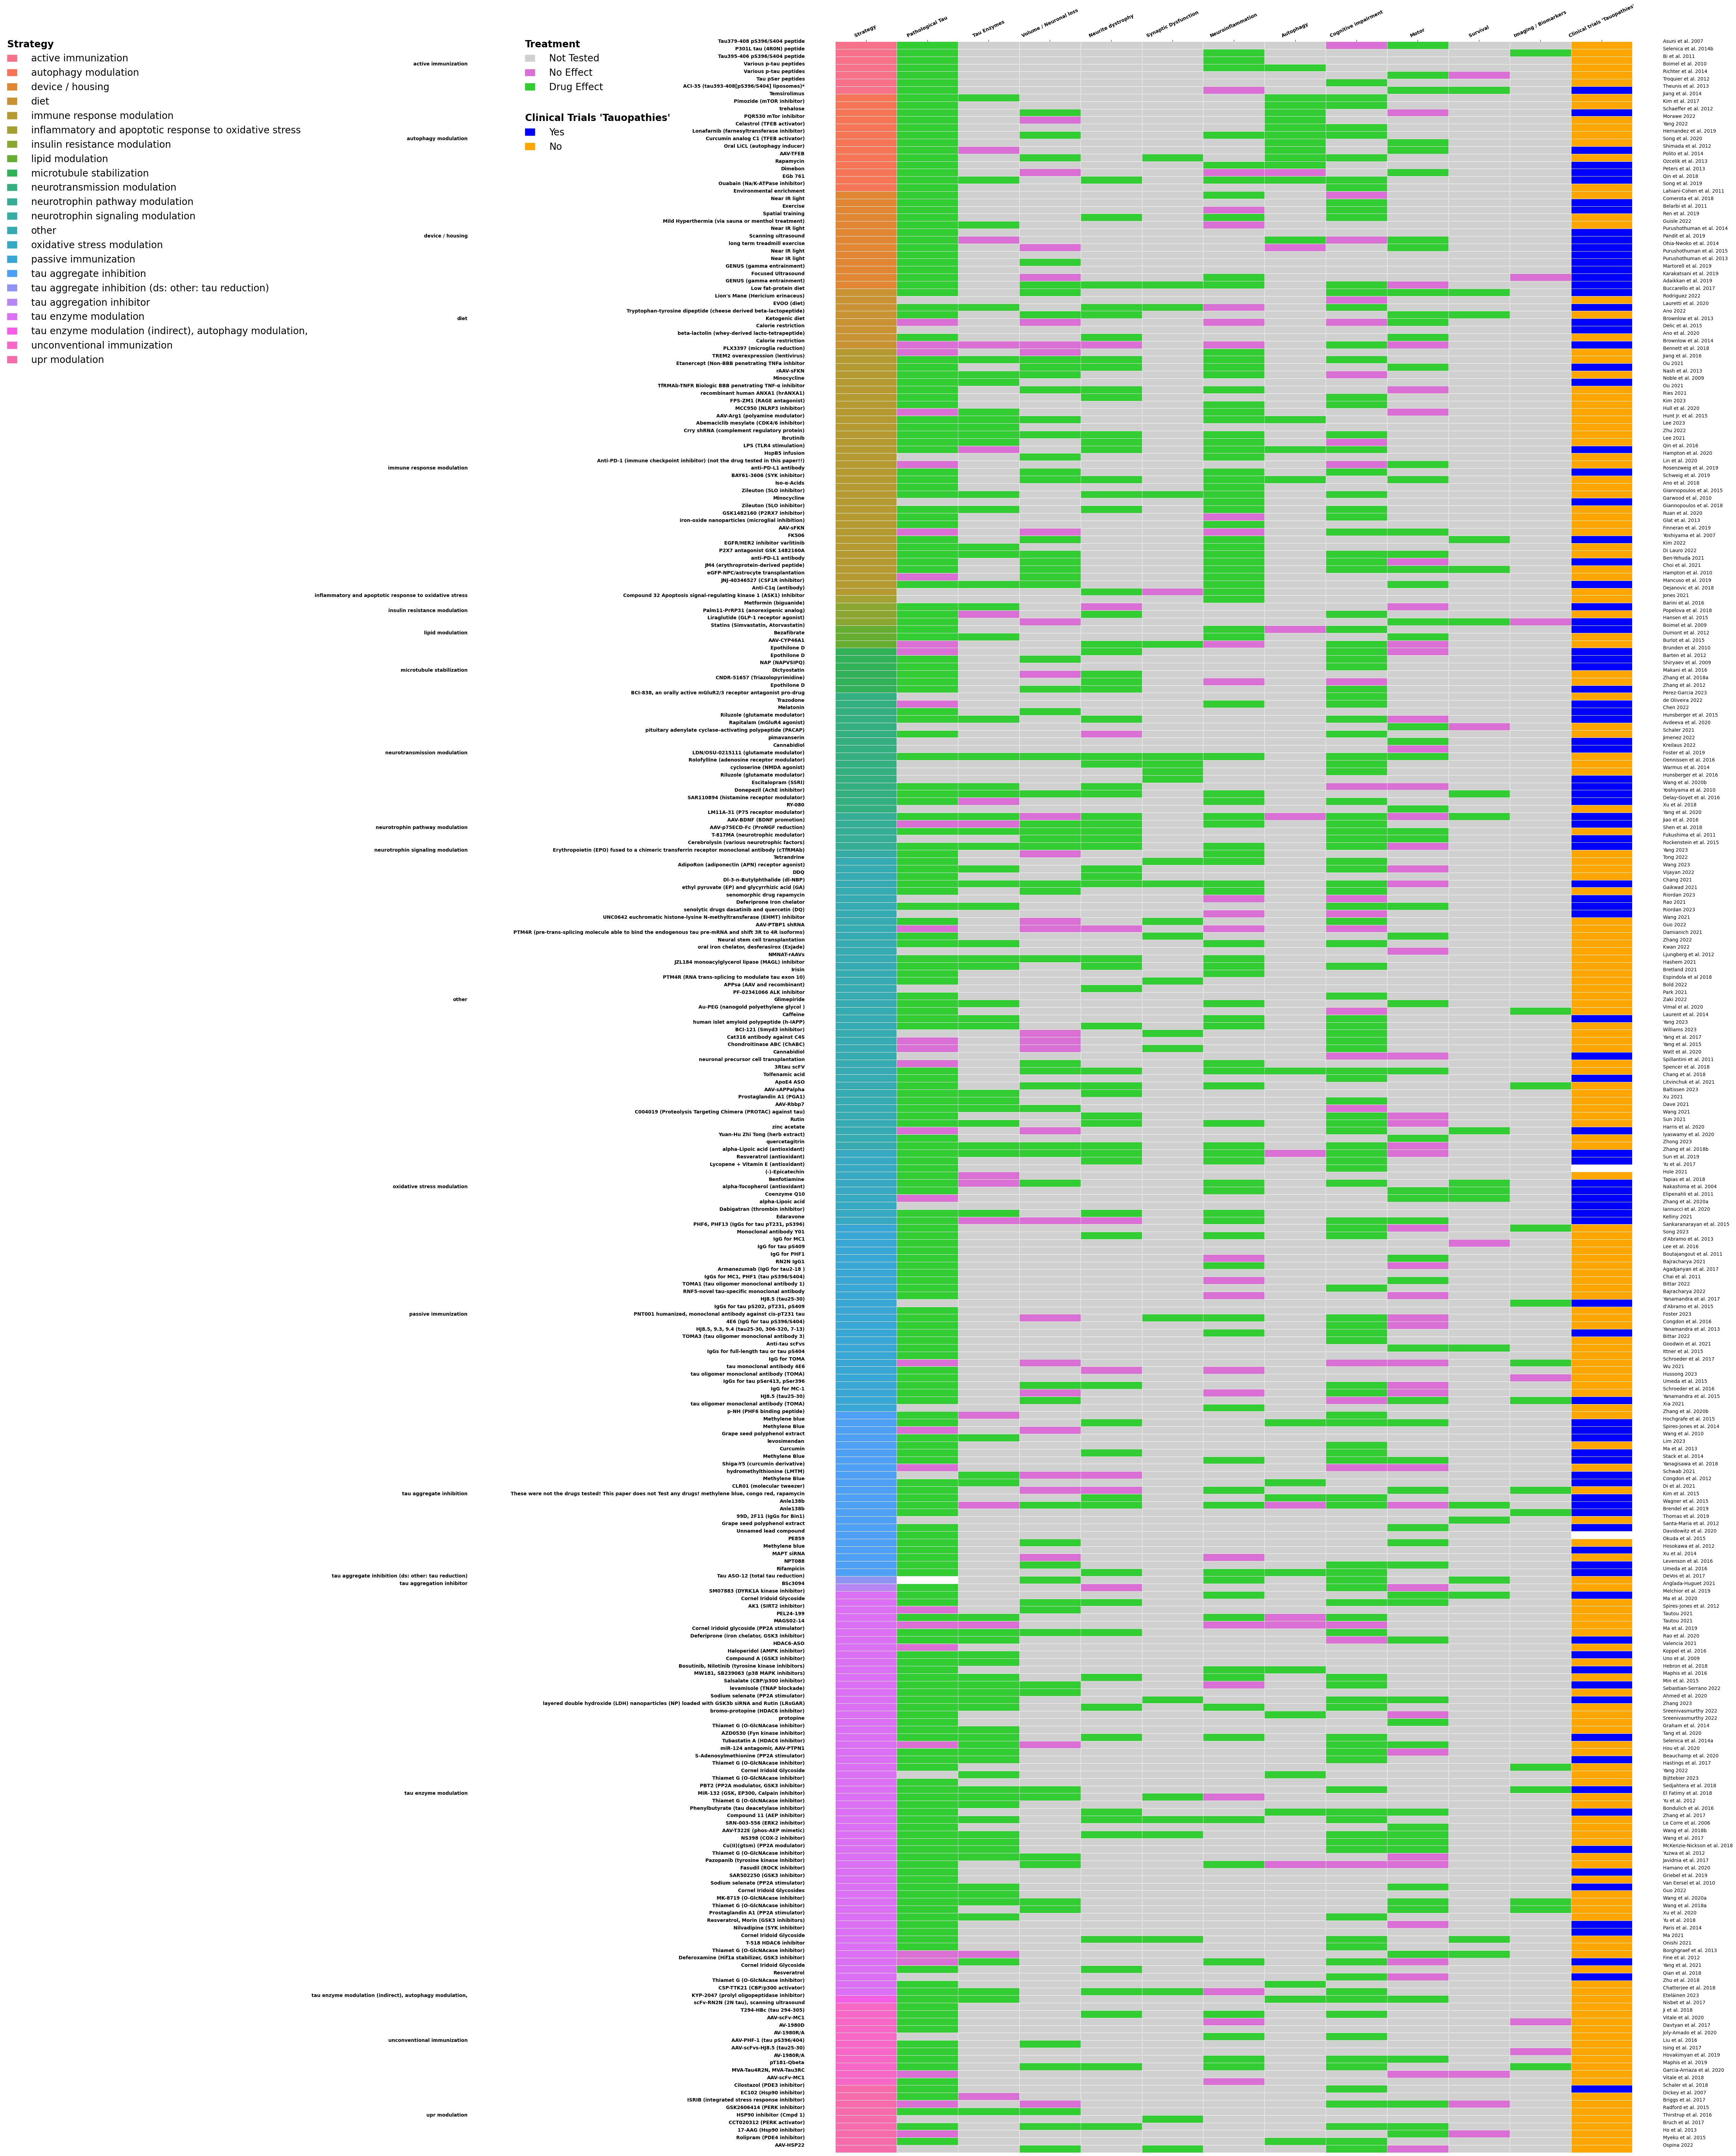

In [115]:
data = data.sort_values(by='Strategy')
strategies = data['Strategy'].tolist()

strategy_mapping = {strategy: (i + 6) for i, strategy in enumerate(data['Strategy'].unique())}
data['Strategy '] = data['Strategy'].map(strategy_mapping)  # Apply mapping immediately after defining it

# Now, define your subset DataFrame
subset = data[["Strategy ", "Pathological Tau", "Tau Enzymes", "Volume / Neuronal loss", "Neurite dystrophy", 
               "Synaptic Dysfunction", "Neuroinflammation", "Autophagy", "Cognitive impairment", 
               "Motor", "Survival", "Imaging / Biomarkers", "Clinical trials 'Tauopathies'"]].copy()

# Extract 'Treatment' and 'Reference' data for annotations
treatments = data['Treatment'].tolist()
references = data['Reference'].tolist()

# 3. Convert the textual values in the columns to numeric values
numeric_mapping = {
    'NT': 1,
    'NE': 2,
    'DE': 3,
    'yes': 4,
    'no': 5
}
for column in subset.columns:
    if column != "Strategy ":
        subset[column] = subset[column].map(numeric_mapping)

# Define colors and labels for heatmap and trials
colors_heatmap = ['#D0D0D0', '#DA70D6', '#32CD32']
labels_heatmap = ['Not Tested', 'No Effect', 'Drug Effect']
colors_trials = ['blue', 'orange']
labels_trials = ['Yes', 'No']

# Generate colors for Strategy
num_strategies = len(data['Strategy'].unique())
strategy_colors = sns.color_palette("husl", num_strategies)

# Colors for all the different types of data
all_colors = colors_heatmap + colors_trials + strategy_colors
cmap = mcolors.ListedColormap(all_colors)

strategy_color_map = dict(zip(data['Strategy'].unique(), strategy_colors))

# Plot the heatmap
fig, ax = plt.subplots(figsize=(30, 80))
sns.heatmap(data=subset, 
            annot=False,
            cmap=cmap,
            cbar=False,
            linewidths=.5,
            vmin=1,  # Starts from 1 as our numeric_mapping starts from 1
            vmax=5 + num_strategies,  # The maximum value (5 values + number of strategies)
            ax=ax,
            yticklabels=False)

# Move column titles to the top
ax.set_xticklabels(ax.get_xticklabels(), rotation=25, weight='bold')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

# Add 'Treatment' annotations on the left
for i, treatment in enumerate(treatments):
    ax.text(-0.5, i, treatment, va='center', ha='right', color='black', weight='bold')

# Add 'Reference' annotations on the right
for i, reference in enumerate(references):
    ax.text(len(subset.columns) + 0.5, i, reference, va='center', ha='left', color='black')

# Add 'Strategy' annotations on the far left
unique_strategies = data['Strategy'].unique()
for strategy in unique_strategies:
    indices = [i for i, x in enumerate(strategies) if x == strategy]
    middle_idx = indices[len(indices) // 2]
    ax.text(-6, middle_idx, strategy, va='center', ha='right', color='black', weight='bold')
    
# Create patch objects for each legend
patches_heatmap = [mpatches.Patch(color=color, label=label) for color, label in zip(colors_heatmap, labels_heatmap)]
patches_trials = [mpatches.Patch(color=color, label=label) for color, label in zip(colors_trials, labels_trials)]
patches_strategy = [mpatches.Patch(color=color, label=strategy) for strategy, color in strategy_color_map.items()]

# Define FontProperties for the title
title_font = FontProperties(weight='bold', size='20')

# Create legends with the new settings
legend1 = ax.legend(handles=patches_heatmap, loc='upper left', bbox_to_anchor=(-0.4, 1.005), fontsize="20", title="Treatment", title_fontproperties=title_font, frameon=False, handlelength=1, handletextpad=1.5)
legend2 = ax.legend(handles=patches_trials, loc='upper left', bbox_to_anchor=(-0.4, 0.97), fontsize="20", title="Clinical Trials 'Tauopathies'", title_fontproperties=title_font, frameon=False, handlelength=1, handletextpad=1.5)
legend3 = ax.legend(handles=patches_strategy, loc='upper left', bbox_to_anchor=(-1.05, 1.005), fontsize="20", title="Strategy", title_fontproperties=title_font, frameon=False, handlelength=1, handletextpad=1.5)

# Align legend title and labels to the left
for legend in [legend1, legend2, legend3]:
    legend._legend_box.align = "left"
        
# Add legends to the plot
ax.add_artist(legend1)
ax.add_artist(legend2)

plt.show()